<a href="https://colab.research.google.com/github/boberrr/touchdesigner/blob/main/Classes_05_LinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Support Vector Machine with linear kernel. Hard and soft margins

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, balanced_accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
import io
from sklearn import set_config
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams["figure.figsize"] = (10,7)

In [2]:
# constans
test_size=0.2
random_state=42

In [3]:
def compute_score_classification(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of accuracy and classification report.

  '''
  return {
        "Accuracy": f"{accuracy_score(y_true, y_pred):.3f}",
        "Classification Report": classification_report(y_true, y_pred),
}

## Exercise 1

1. Use the toy, generated data below and create the simplest linear SVM classification model. Use [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) scikit-learn class with the `kernel="linear"` parameter.

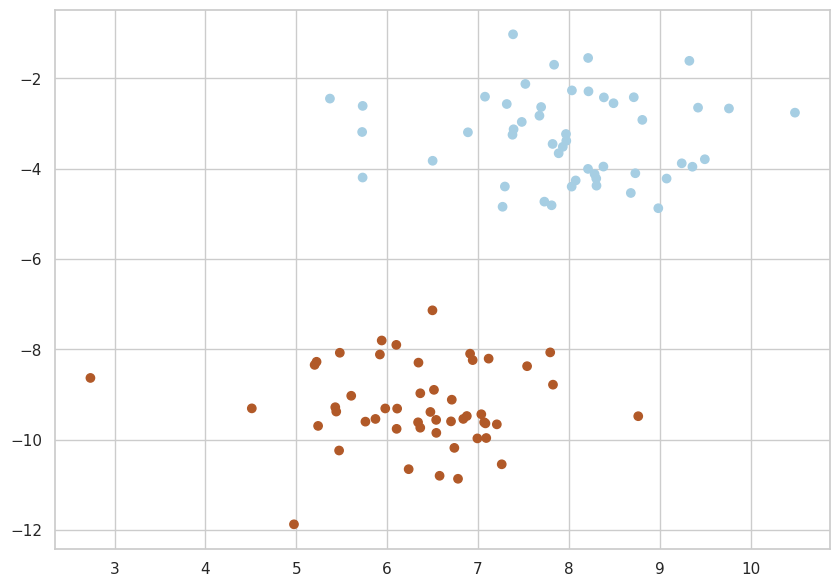

In [4]:
# we create 40 separable points
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# plot our data
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.Paired
)
plt.show()

2. Create classification model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# create object of linear SVC estimator
# your code here

svc = SVC(kernel='linear')

# fit the model
# your code here
svc.fit(X_train, y_train)

SVC(kernel='linear')

3. Plot decision boundaries.

Plot Decision Boundaries
The code below uses the [`DecisionBoundaryDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) class to visualize the SVM decision boundaries. It also highlights the support vectors stored in the classifier after training.

NameError: name 'clf' is not defined

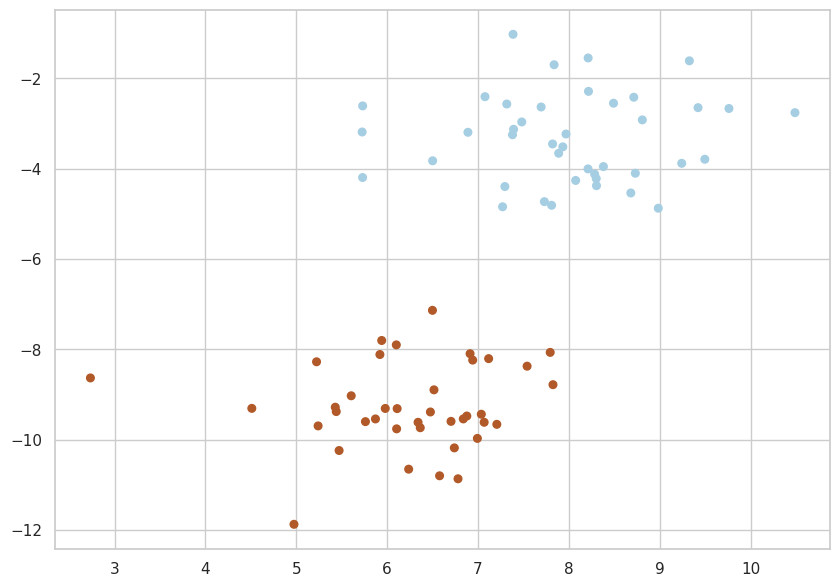

In [20]:
# plot data
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=30,
    cmap=plt.cm.Paired
)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

Now, it is evident that this classification problem was straightforward, and our estimator performed exceptionally well.

## Exercise 2

Now, compare the classification results and the decision boundaries from estimators with **hard** and **soft margins**. Which parameter in SVC controls the margins' softeness? Consider what values can represent soft and hard margins.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# your code here

## Exercise 3: Real data
Now, take a look at the real-world data SVM.

### Load dataset

In [29]:
!pip install wget
import wget
# Download the dataset from the provided URL
url = 'https://github.com/abelowska/dataPy/raw/main/data_neo-ffi_religion.csv'
wget.download(url)

df = pd.read_csv('data_neo-ffi_religion.csv')
df['Orthodoxy'] = np.log(df[['Orthodoxy']].to_numpy())


# add class indicator: either External Critique or Orthodoxy
df['class'] = df[['External Critique', 'Orthodoxy']].idxmax(axis=1)
df.head()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté,class
0,34.082439,46.043690,40.788554,461.110426,43.865868,2.838143,2.586507,3.744990,6.093860,4.458938,External Critique
1,45.914894,45.968433,41.235290,401.384274,28.027017,3.824136,2.294873,3.392507,5.230517,3.269949,External Critique
2,33.008654,42.065841,42.069170,390.193510,41.023889,2.288471,2.367948,3.765416,4.801786,4.683288,Orthodoxy
3,56.112153,45.903571,53.080369,468.518727,20.018578,5.824989,2.621076,2.826005,2.592473,0.883451,External Critique
4,31.972346,49.009174,42.161417,508.686847,43.026028,4.038579,2.736421,4.689029,4.916692,4.627536,External Critique


Inspect the dataset

In [14]:
df.describe()

,Extraversion,Agreeableness,Conscientiousness,Openness,Neuroticism,External Critique,Orthodoxy,Historical Relativism,Relativism,Second Naïveté
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,37.811238,42.318673,41.208357,436.675828,36.042290,3.880765,2.581919,4.883313,5.299550,4.223002
std,8.871624,7.222606,8.104708,63.642560,11.014191,1.259730,1.129017,0.778776,0.944093,1.392345
min,14.040682,21.008399,16.904128,289.257541,12.942666,0.876634,0.816596,1.304512,1.905408,0.801310
25%,32.079634,37.959417,35.084398,388.849925,27.908735,3.046971,1.706643,4.430331,4.729321,3.169300
50%,38.954182,43.089033,41.052187,440.203497,35.908038,3.762668,2.411769,4.922857,5.437686,4.434408
75%,43.946449,47.078293,47.089308,480.501705,44.692161,4.684792,3.334454,5.373428,5.981834,5.213640
max,56.882820,59.121317,59.000430,572.957659,60.030339,6.935906,7.131491,6.877499,7.139185,7.151545


### Model

Create simple SVM classification model: *class ~ Agreeableness + Openness* with linear kernel.

1. Check the accuracy and other stats of the model
2. Check the overfitting

In [30]:
# your code here

X = df[['Agreeableness', 'Openness']].to_numpy()
y = df['class'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(compute_score_classification(y_test, y_pred))
clf = svc
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
ax.set_title('Linear Kernel')
plt.show()
# Training set evaluation
y_train_pred = svc.predict(X_train)
print("Training Performance:", compute_score_classification(y_train, y_train_pred))

   # Test set evaluation (already present in the code)
y_pred = svc.predict(X_test)
print("Test Performance:", compute_score_classification(y_test, y_pred))


{'Accuracy': '0.710', 'Classification Report': '                   precision    recall  f1-score   support\n\nExternal Critique       0.71      1.00      0.83        49\n        Orthodoxy       0.00      0.00      0.00        20\n\n         accuracy                           0.71        69\n        macro avg       0.36      0.50      0.42        69\n     weighted avg       0.50      0.71      0.59        69\n'}
Training Performance: {'Accuracy': '0.769', 'Classification Report': '                   precision    recall  f1-score   support\n\nExternal Critique       0.77      1.00      0.87       210\n        Orthodoxy       0.00      0.00      0.00        63\n\n         accuracy                           0.77       273\n        macro avg       0.38      0.50      0.43       273\n     weighted avg       0.59      0.77      0.67       273\n'}
Test Performance: {'Accuracy': '0.710', 'Classification Report': '                   precision    recall  f1-score   support\n\nExternal Critique   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Plot the decision boundaries

<ipython-input-31-fcd4616b0416>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


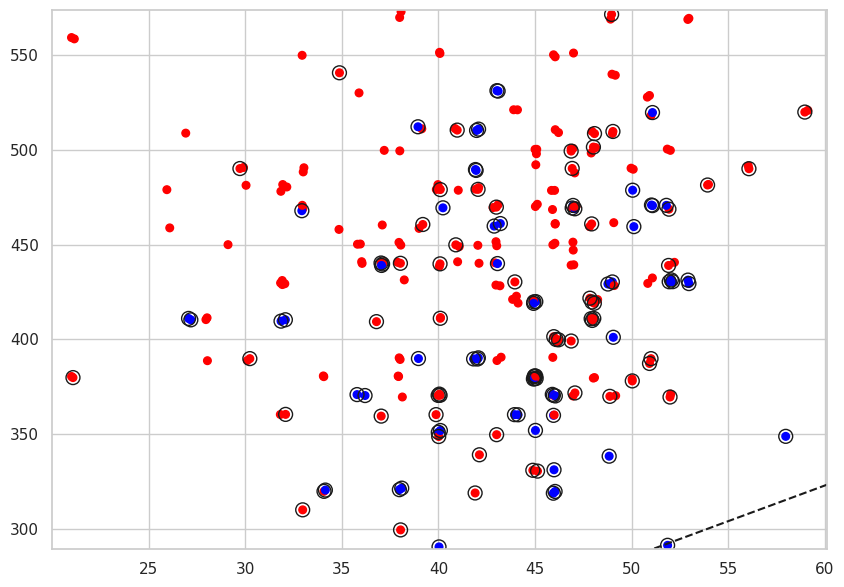

In [31]:
colors = ['red' if x == 'External Critique' else 'blue' for x in y_train]
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=colors,
    s=30,
    cmap=plt.cm.Paired
)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=1.0,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### (Exercise 3.1)

Plot the relationship between accuracy on the training dataset, testing dataset, and the C.

In [ ]:
# your code here


### (Exercise 3.2)

Some of the problems might stem from class imbalance. Think: how can we address this issue? Try to create model that account for the class imbalance.

In [ ]:
# your code here